Steps that will be followed.

1. Import data
2. Preprocess the data (train and test data)
3. Create an stacked LSTM model.
4. Predict the test data and plot the output.
5. Predict the future 30 days and plot the output.

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

**Step 1: Importing Data**



In [16]:
# loading the dataset

dataset = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

# printing the head of dataset

dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [17]:
# we are doing price prediction for particularly "Open" column

dataset = dataset.reset_index()['Open']

In [8]:
# printing the dataset

dataset

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

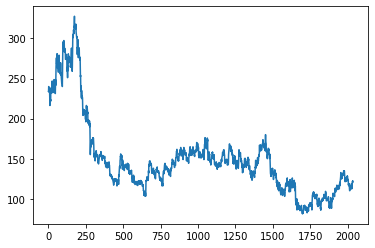

In [9]:
# plotting the dataset

plt.plot(dataset)

In [19]:
# printing number of rows and columns

dataset.shape

(2035,)

In [21]:
# LSTM are sensitive to the scale of the data. So we apply MinMax Scalar

scaler = MinMaxScaler(feature_range = (0, 1)) # we will 0 and 1 to coresponding datapoint
dataset = scaler.fit_transform(np.array(dataset).reshape(-1, 1))

In [22]:
# printing number of rows and columns

dataset.shape    

(2035, 1)

In [23]:
# dataset converted into array of 0s and 1s

dataset

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

**Step 2: Preprocess the data (train and test data)**

In [26]:
# splitting dataset for train and test

training_size = int(len(dataset) * 0.65) # 65% of dataset will be use for training
test_size = len(dataset) - training_size
train_data, test_data = dataset[0:training_size], dataset[training_size:len(dataset),:1]

In [25]:
# printing the size of training and testing data

training_size, test_size

(1322, 713)

In [27]:
# printing the training data

train_data

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.26094891],
       [0.25547445],
       [0.24553933]])

In [30]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
  # moving forward in each iteration
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i + time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [31]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
# printing the dimension of dataset

print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [33]:
# printing the dimension of dataset

print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

**Step 3: Create an stacked LSTM model.**

In [34]:
# reshape input to be 3 dimensions (samples, time steps, features), which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [35]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs = 100, batch_size = 64, verbose=1)

Epoch 1/100
20/20 [==============================] - 9s 231ms/step - loss: 0.0249 - val_loss: 0.0033
Epoch 2/100
20/20 [==============================] - 3s 170ms/step - loss: 0.0023 - val_loss: 8.3845e-04
Epoch 3/100
20/20 [==============================] - 3s 170ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 4/100
20/20 [==============================] - 3s 168ms/step - loss: 0.0015 - val_loss: 8.8159e-04
Epoch 5/100
20/20 [==============================] - 3s 169ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 3s 168ms/step - loss: 0.0013 - val_loss: 9.7506e-04
Epoch 7/100
20/20 [==============================] - 3s 171ms/step - loss: 0.0013 - val_loss: 9.1258e-04
Epoch 8/100
20/20 [==============================] - 3s 169ms/step - loss: 0.0012 - val_loss: 9.4957e-04
Epoch 9/100
20/20 [==============================] - 3s 167ms/step - loss: 0.0011 - val_loss: 8.6296e-04
Epoch 10/100
20/20 [==============================] - 3s 170ms/step

**Step 4: Predict the test data and plot the output.**

In [39]:
# lets do the prediction and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [40]:
# transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [41]:
# calculate the RMSE performance metrics of training data

math.sqrt(mean_squared_error(y_train, train_predict))

166.60876100926902

In [42]:
# calculate the RMSE performance metrics of testing data

math.sqrt(mean_squared_error(ytest, test_predict))

116.98569236444627

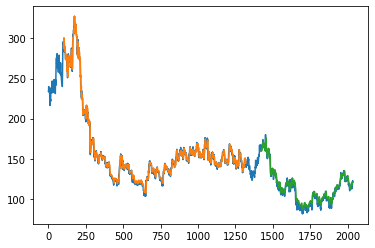

In [43]:
# plotting 
# shift train predictions for plotting
look_back = 100 # timesteps
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Green Color = Test Data/Predicted Output

Blue Color = Complete Dataset

Orange Color = Training Data

In [44]:
# printing number of test data points

len(test_data)

713

In [45]:
x_input = test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
# previous 100 days data

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [47]:
temp_input

[0.14111922141119226,
 0.13746958637469586,
 0.13990267639902676,
 0.13017031630170317,
 0.14152473641524738,
 0.14111922141119226,
 0.13138686131386862,
 0.1291565287915653,
 0.1309813463098135,
 0.126926196269262,
 0.15166261151662613,
 0.15004055150040552,
 0.1419302514193025,
 0.16017842660178427,
 0.15693430656934304,
 0.16504460665044607,
 0.17700729927007297,
 0.1814679643146796,
 0.18815896188158965,
 0.2092457420924574,
 0.19424168694241684,
 0.18106244931062454,
 0.18207623682076235,
 0.19606650446066498,
 0.1768045417680454,
 0.18207623682076235,
 0.18004866180048662,
 0.18207623682076235,
 0.1887672343876724,
 0.19383617193836178,
 0.1909975669099756,
 0.19505271695052717,
 0.1980940794809407,
 0.20640713706407143,
 0.19748580697485807,
 0.19525547445255476,
 0.2043795620437956,
 0.19870235198702346,
 0.21796431467964317,
 0.21553122465531227,
 0.20600162206001627,
 0.21654501216545008,
 0.21654501216545008,
 0.217558799675588,
 0.19870235198702346,
 0.19018653690186538,
 0

**Step 5: Predict the future 30 days and plot the output.**

In [48]:
# demonstrate prediction for next 30 days

lst_output = []
n_steps = 100
i=0
while(i < 30): # 30 days
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16867198]
101
1 day input [0.13746959 0.13990268 0.13017032 0.14152474 0.14111922 0.13138686
 0.12915653 0.13098135 0.1269262  0.15166261 0.15004055 0.14193025
 0.16017843 0.15693431 0.16504461 0.1770073  0.18146796 0.18815896
 0.20924574 0.19424169 0.18106245 0.18207624 0.1960665  0.17680454
 0.18207624 0.18004866 0.18207624 0.18876723 0.19383617 0.19099757
 0.19505272 0.19809408 0.20640714 0.19748581 0.19525547 0.20437956
 0.19870235 0.21796431 0.21553122 0.20600162 0.21654501 0.21654501
 0.2175588  0.19870235 0.19018654 0.17802109 0.175588   0.16301703
 0.16707218 0.17112733 0.17639903 0.18349554 0.1717356  0.16423358
 0.16991079 0.17619627 0.16788321 0.16909976 0.17396594 0.17741281
 0.18268451 0.19221411 0.18896999 0.19018654 0.17396594 0.17092457
 0.16788321 0.17477697 0.16443633 0.14557989 0.15287916 0.15369019
 0.15044607 0.14152474 0.15145985 0.13341444 0.12530414 0.11719384
 0.11780211 0.12489862 0.14132198 0.13098135 0.12935929 0.13240065
 0.12895377 0.12530414 0.13381995

In [49]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [51]:
len(dataset)

2035

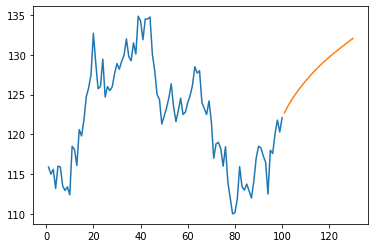

In [52]:
# this orange line is 30 days prediction

plt.plot(day_new, scaler.inverse_transform(dataset[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

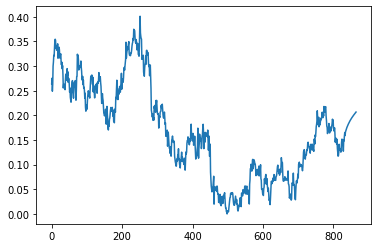

In [53]:
dataset = dataset.tolist()
dataset.extend(lst_output)
plt.plot(dataset[1200:])

In [54]:
dataset = scaler.inverse_transform(dataset).tolist()

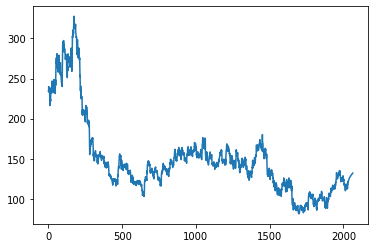

In [55]:
plt.plot(dataset)